In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import seaborn as sns

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pio.templates.default = "plotly_white"

In [3]:
from src.plot_utils import plot_correlation_matrix, plot_boxplots

## 1. Chargement du jeu de donnée

In [4]:
df = pd.read_csv('../../data/outputs/05_merged_data.csv')

In [5]:
print(df.shape)
df.head()

(26080, 24)


,resultId,raceId,driverId,constructorId,grid,race_rank,points,laps,milliseconds,fastestLap,...,round,circuitId,circuit_name,constructor_name,country,constructor_is_active,nationality,driver_is_active,full_name,season_age
0,1,18,1,1,1,1,10.0,58,5690616,39,...,1,1,Australian Grand Prix,McLaren,British,1,British,1,Lewis Hamilton,23
1,2,18,2,2,5,2,8.0,58,5696094,41,...,1,1,Australian Grand Prix,BMW Sauber,German,0,German,0,Nick Heidfeld,31
2,3,18,3,3,7,3,6.0,58,5698779,41,...,1,1,Australian Grand Prix,Williams,British,1,German,0,Nico Rosberg,23
3,4,18,4,4,11,4,5.0,58,5707797,58,...,1,1,Australian Grand Prix,Renault,French,0,Spanish,1,Fernando Alonso,27
4,5,18,5,1,3,5,4.0,58,5708630,43,...,1,1,Australian Grand Prix,McLaren,British,1,Finnish,0,Heikki Kovalainen,27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               26080 non-null  int64  
 1   raceId                 26080 non-null  int64  
 2   driverId               26080 non-null  int64  
 3   constructorId          26080 non-null  int64  
 4   grid                   26080 non-null  int64  
 5   race_rank              26080 non-null  int64  
 6   points                 26080 non-null  float64
 7   laps                   26080 non-null  int64  
 8   milliseconds           26080 non-null  int64  
 9   fastestLap             26080 non-null  int64  
 10  fastestLapTime         26080 non-null  int64  
 11  fastestLapSpeed        26080 non-null  float64
 12  statusId               26080 non-null  int64  
 13  year                   26080 non-null  int64  
 14  round                  26080 non-null  int64  
 15  ci

## 2. Analyse des course

### 2.1. Nombre de courses par an

In [7]:
fig = px.histogram(df, x='year', y='raceId', histfunc='count', nbins=100, height=700)
fig.update_layout(barmode='stack', xaxis_title='Années', yaxis_title='Nbre de courses')

### 2.2. Nombres de courses par circuit

In [8]:
fig = px.histogram(df, x='circuit_name', y='raceId', histfunc='count', nbins=100, height=700)
fig.update_layout(barmode='stack', xaxis_title='Pays', yaxis_title='Nbre de courses')

Nous remarquons ici qu'il y'a certains circuits où très peu de courses se sont éffectuée et ou ne se déroulent plus. Donc nous pourrons supprimer toutes les courses rattachées à ces circuits plus tard, tout en ténant compte des circuits ajouté récemments: <br>
- Circuit de Yas Marina - Abu Dhabi, Émirats arabes unis
- Circuit de Monza - Monza, Italie
- Circuit de Spa-Francorchamps - Stavelot, Belgique
- Circuit de Suzuka - Suzuka, Japon
- Circuit de Silverstone - Silverstone, Royaume-Uni
- Circuit de Monaco - Monaco
- Circuit de Shanghai International - Shanghai, Chine
- Circuit de Interlagos - São Paulo, Brésil
- Circuit de Circuit of the Americas - Austin, Texas, États-Unis
- Circuit de Circuit Gilles Villeneuve - Montréal, Canada

## 2. Analyse des pilotes

### 2.1. Nombre de participation au Grand Prix par pilote actif

L'idée ici est de connaître l'anciennneté de chacun des pilotes actifs actuels car cette information pourra avoir un impact important sur la prédiction du résultat

In [9]:
data = df[df['driver_is_active'] == 1]
fig = px.histogram(data, x='full_name', y='raceId', histfunc='count', nbins=60, height=700)
fig.update_layout(barmode='stack', xaxis_title='Race Rank', yaxis_title='Nbre de fois')

### 2.2. Visualiser le nombre de victoire par pilote actifs

In [10]:
data = df[(df['race_rank'] == 1) & (df['driver_is_active'] == 1)]
px.histogram(data, x='full_name', y='resultId', histfunc='count', title='Nombre de victoires par pilote actifs')

### 2.3. Nombre de courses terminé pour chaque pilote actif à un rang détérminé

In [11]:
# Filtrons uniquement les pilotes actifs
data = df[df['driver_is_active'] == 1]
fig = px.histogram(data, x='race_rank', color='full_name', nbins=60, height=700)
fig.update_layout(barmode='stack', xaxis_title='Race Rank', yaxis_title='Nbre de fois')

/Users/stephcyrille/Projects/Personal/project_ia_f1_gp_predictor/.venv/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 2.4. Nombre de fois qu'un pilote figure dans le top 10 (Zone des points en F1)

In [12]:
# Filtrons uniquement les pilotes actifs et les rangs de la zone de points
data = df[(df['race_rank'] <= 10) & (df['driver_is_active'] == 1)]
fig = px.histogram(data, x='race_rank', color='full_name', y='resultId', histfunc='count', nbins=20, height=700)
fig.update_layout(barmode='stack', xaxis_title='Position du pilote', yaxis_title='Nbre de fois')

/Users/stephcyrille/Projects/Personal/project_ia_f1_gp_predictor/.venv/lib/python3.9/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



### 2.5. Nombre de course abandonnées par pilotes actifs
Le statusId = 1 correspond à une course terminée, tout autre status représente une course non terminée pour un motif bien défini.<br>
Nous comptons plus de 100 statuts différents correspondant à une cause bien déterminée et donc les détails ne nous seront pas necessaires dans la suite de notre travail 

In [13]:
# Filtrons uniquement les pilotes actifs et ayant terminé la course
data = df[(df['statusId'] != 1) & (df['driver_is_active'] == 1)]
fig = px.histogram(data, x='full_name', y='raceId', histfunc='count', nbins=20, height=700)
fig.update_layout(barmode='stack', xaxis_title='Nom du pilote', yaxis_title='Nbre de fois')

### 2.6. Le pilote actif qui detient le plus grand nombre de point cumulé sur toutes les saisons

In [14]:
# Filtrons uniquement les pilotes actifs
data = df[df['driver_is_active'] == 1]
fig = px.histogram(data, x='full_name', y='points', histfunc='sum', nbins=20, height=700)
fig.update_layout(barmode='stack', xaxis_title='Nom du pilote', yaxis_title='Nbre de points')

## 3. Analyse par constructeurs

### 3.1. Visualiser le nombre de victoires par constructeur actif

In [15]:
df_const_winners = df[(df['race_rank'] == 1) & (df['constructor_is_active'] == 1)]
px.histogram(df_const_winners, x='constructor_name', y='resultId', histfunc='count', title='Nombre de victoires par écurie', height=700)

### 3.2. L'écurie active avec le plus grand nombre de points 

In [16]:
# Filtrons uniquement les pilotes actifs
data = df[df['constructor_is_active'] == 1]
fig = px.histogram(data, x='constructor_name', y='points', histfunc='sum', nbins=20, height=700)
fig.update_layout(barmode='stack', xaxis_title='Nom du pilote', yaxis_title='Nbre de points')

## 4. Analyse des dispersion

In [17]:
columns = ['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'race_rank',
       'points', 'laps', 'milliseconds', 'fastestLap', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId']

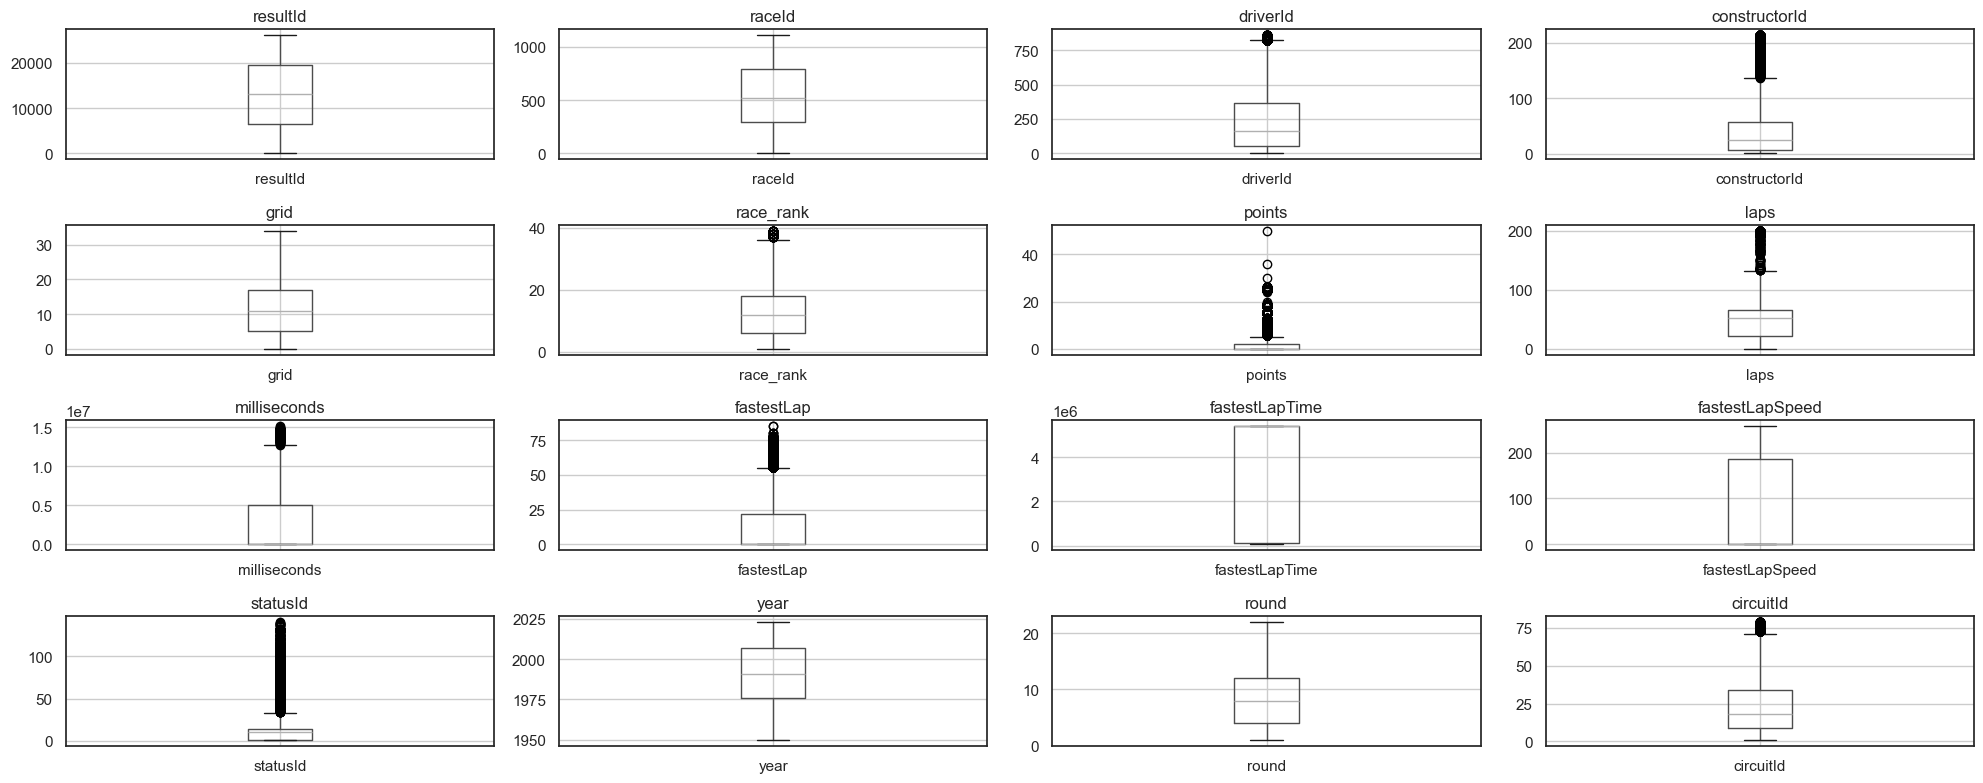

In [18]:
plot_boxplots(df, columns, 4, 4)

## 5. Analyse des Corréllations

- Pourquoi nous n'avomns pas de corrélation entre la position de la course et le pilote?? Probablement parce que les pilotes changent de constructeur par saison!!
- Idem avec le constructeur ? Probablement parce que certains constructeurs ont changer de dénominations et on aspirées d'autres

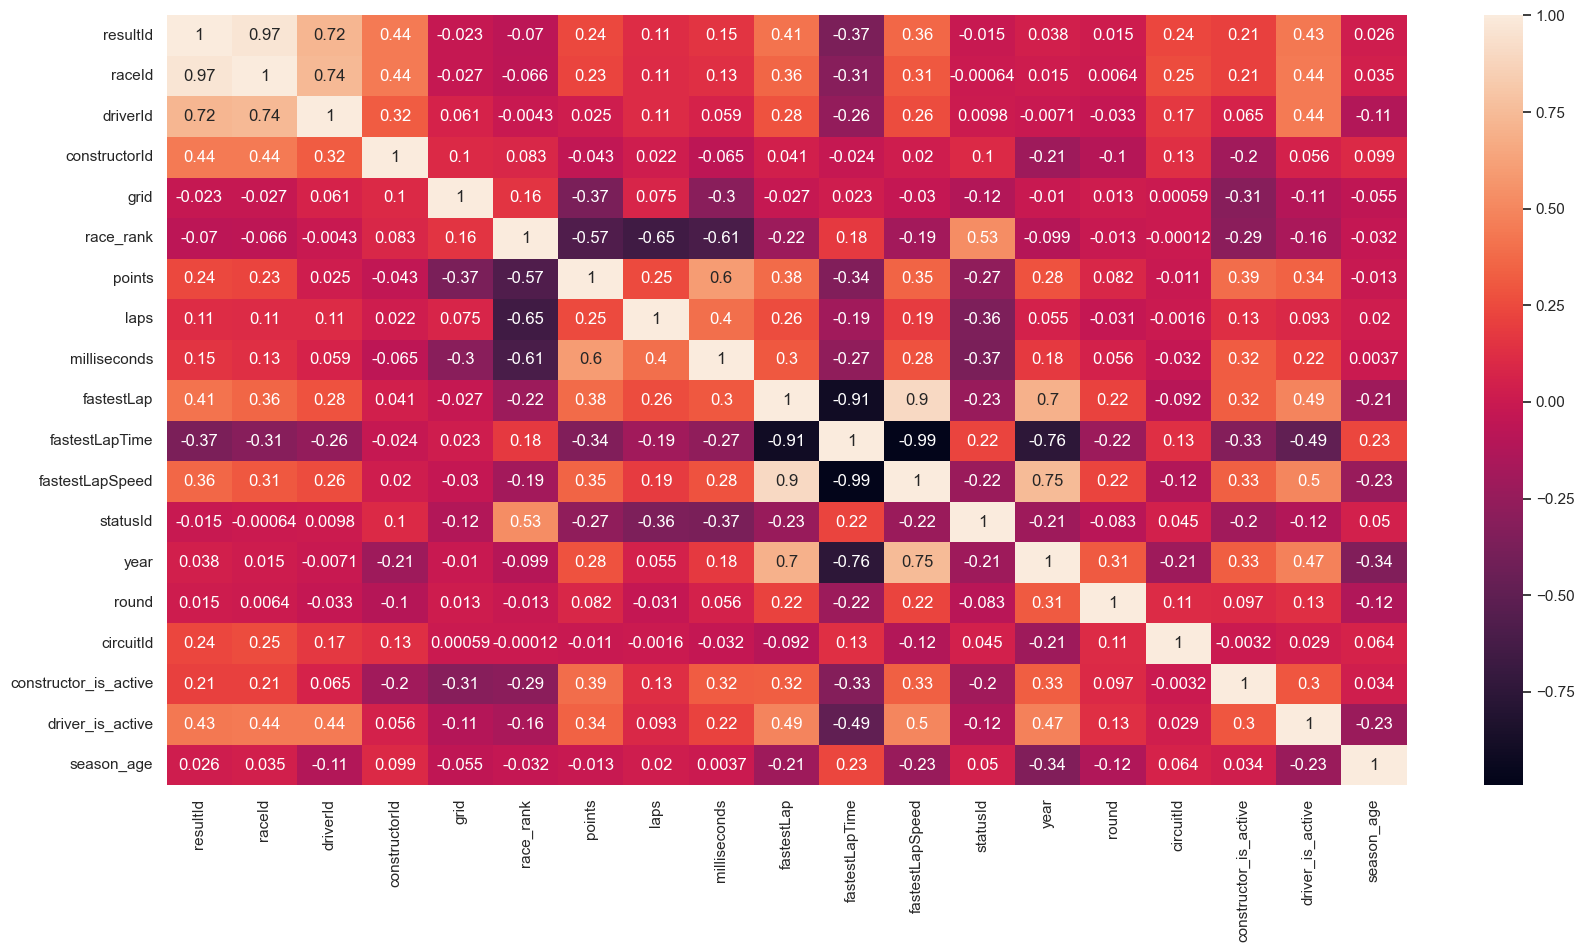

In [19]:
plot_correlation_matrix(df)

In [20]:
# cols = df.select_dtypes(np.object_).columns
# features_df = df.drop(cols, axis=1)
# sns.pairplot(features_df, hue='race_rank')